In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Import Quarterback performance dataset

### Collect data

In [63]:
career_stats_passing = pd.read_csv("Career_Stats_Passing.csv")

In [64]:
career_stats_passing

,Player Id,Name,Position,Year,Team,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,...,TD Passes,Percentage of TDs per Attempts,Ints,Int Rate,Longest Pass,Passes Longer than 20 Yards,Passes Longer than 40 Yards,Sacks,Sacked Yards Lost,Passer Rating
0,tomfarris/2513861,"Farris, Tom",NaN,1948,Chicago Rockets,0,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
1,tomfarris/2513861,"Farris, Tom",NaN,1947,Chicago Bears,9,2,0,0.0,0.2,...,0,0.0,0,0.0,--,0,0,0,0,39.6
2,tomfarris/2513861,"Farris, Tom",NaN,1946,Chicago Bears,11,21,8,38.1,1.9,...,1,4.8,2,9.5,--,0,0,0,0,31.5
3,billdemory/2512778,"Demory, Bill",NaN,1974,New York Jets,1,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
4,billdemory/2512778,"Demory, Bill",NaN,1973,New York Jets,6,39,12,30.8,6.5,...,2,5.1,8,20.5,--,0,0,8,73,22.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8520,billanderson/2508534,"Anderson, Bill",NaN,1962,Washington Redskins,12,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
8521,billanderson/2508534,"Anderson, Bill",NaN,1961,Washington Redskins,14,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
8522,billanderson/2508534,"Anderson, Bill",NaN,1960,Washington Redskins,12,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0
8523,billanderson/2508534,"Anderson, Bill",NaN,1959,Washington Redskins,11,--,--,--,0.0,...,--,--,--,--,--,--,--,--,--,0.0


Career_stats_passing dataset contains information about the quarterbacks performance

In [65]:
qb_performance = career_stats_passing.copy()

Convert string columns to numerical data types

In [66]:
numerical_columns = ['Passes Completed', 'Passes Attempted', 'Passing Yards', 'TD Passes', 'Ints']
for col in numerical_columns:
    qb_performance[col] = pd.to_numeric(qb_performance[col], errors='coerce')

### Feature Engineering

Create new features that could potentially improve the model's performance

In [95]:
qb_performance['Completion Percentage'] = qb_performance['Passes Completed'] / qb_performance['Passes Attempted']
qb_performance['Yards per Attempt'] = qb_performance['Passing Yards'] / qb_performance['Passes Attempted']
qb_performance['Touchdown per Attempt'] = qb_performance['TD Passes'] / qb_performance['Passes Attempted']
qb_performance['Interception per Attempt'] = qb_performance['Ints'] / qb_performance['Passes Attempted']

Completion Percentage: Represents the percentage of passes that the quarterback has completed,show the accuracy of the quarterback

Yards per Attempt: Represents the average number of yards gained per pass attempt, and show the efficiency of the quarterback.

Touchdown per Attempt: Represents the percentage of passes that result in a touchdown and show the effectiveness of the quarterback in the red zone.

Interception per Attempt: Represents the percentage of passes that are intercepted,understand the decision-making and risk-taking of the quarterback.

Replace infinity values with NaN and fill any NaN values with 0

In [68]:
qb_performance.replace([np.inf, -np.inf], np.nan, inplace=True)

In [82]:
qb_performance.fillna(0, inplace=True)

Group by player and year to calculate the average performance over time

In [85]:
qb_performance_grouped = qb_performance.groupby(['Player Id', 'Year']).mean().reset_index()

In [86]:
qb_performance_grouped

,Player Id,Year,Games Played,Passes Attempted,Passes Completed,Completion Percentage,Pass Attempts Per Game,Passing Yards,TD Passes,Ints,Passer Rating,Yards per Attempt,Touchdown per Attempt,Interception per Attempt
0,a.j.feeley/2504566,2001,1.0,14.0,10.0,0.714286,14.0,143.0,2.0,1.0,114.0,10.214286,0.142857,0.071429
1,a.j.feeley/2504566,2002,6.0,154.0,86.0,0.558442,25.7,0.0,6.0,5.0,75.4,0.000000,0.038961,0.032468
2,a.j.feeley/2504566,2003,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,a.j.feeley/2504566,2004,11.0,356.0,191.0,0.536517,32.4,0.0,11.0,15.0,61.7,0.000000,0.030899,0.042135
4,a.j.feeley/2504566,2005,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8291,yalelary/2519113,1960,12.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8292,yalelary/2519113,1961,14.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8293,yalelary/2519113,1962,14.0,1.0,0.0,0.000000,0.1,0.0,0.0,0.0,39.6,0.000000,0.000000,0.000000
8294,yalelary/2519113,1963,10.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


## EDA

Plot the performance over time

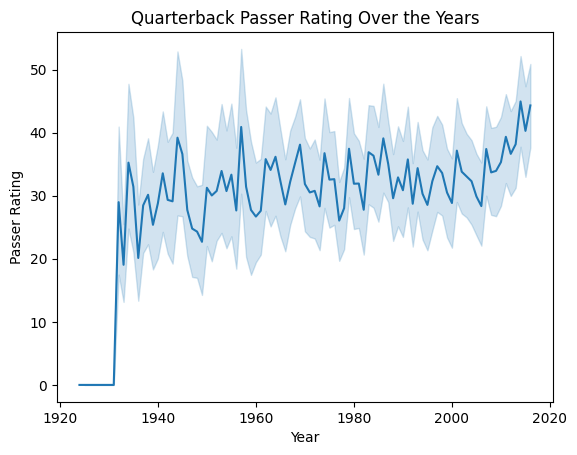

In [87]:
sns.lineplot(x='Year', y='Passer Rating', data=qb_performance_grouped)
plt.title("Quarterback Passer Rating Over the Years")
plt.show()

Correlation heatmap to visualize decision-making patterns

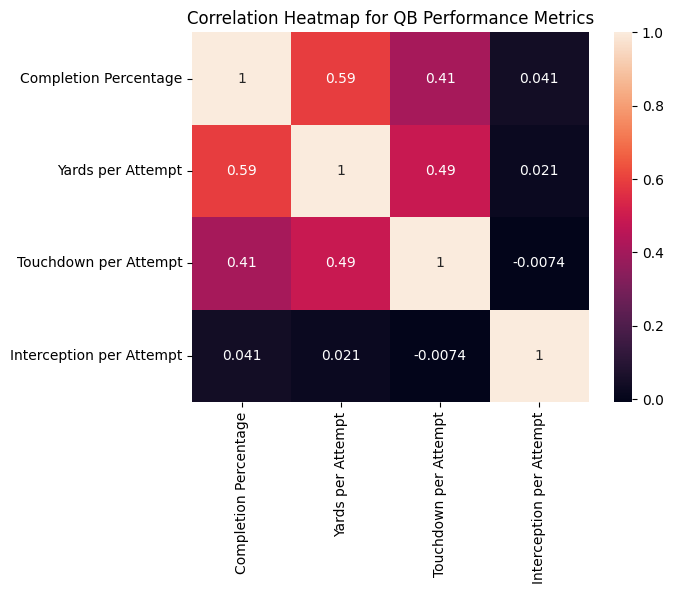

In [88]:
qb_corr = qb_performance[['Completion Percentage', 'Yards per Attempt', 'Touchdown per Attempt', 'Interception per Attempt']].corr()
sns.heatmap(qb_corr, annot=True)
plt.title('Correlation Heatmap for QB Performance Metrics')
plt.show()

 Select the features and target variable

In [89]:
feature_columns = ['Completion Percentage', 'Yards per Attempt', 'Touchdown per Attempt', 'Interception per Attempt']
target_column = 'Passer Rating'

# Linear Regression Model

In [74]:
X = qb_performance[feature_columns]
y = qb_performance[target_column]

In [90]:
X

,Completion Percentage,Yards per Attempt,Touchdown per Attempt,Interception per Attempt
0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.380952,5.142857,0.047619,0.095238
3,0.000000,0.000000,0.000000,0.000000
4,0.307692,4.076923,0.051282,0.205128
...,...,...,...,...
8520,0.000000,0.000000,0.000000,0.000000
8521,0.000000,0.000000,0.000000,0.000000
8522,0.000000,0.000000,0.000000,0.000000
8523,0.000000,0.000000,0.000000,0.000000


In [91]:
y

0        0.0
1       39.6
2       31.5
3        0.0
4       22.2
        ... 
8520     0.0
8521     0.0
8522     0.0
8523     0.0
8524     0.0
Name: Passer Rating, Length: 8525, dtype: float64

### Split the data into training and testing sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the data and train the model

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

Predict passer ratings for the test set

In [94]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([121.55486069,  69.39745753,   5.24243676, ...,   5.24243676,
        82.22279863,  53.73310185])

### Evaluate the model's performance

In [79]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [80]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 230.03
Root Mean Squared Error: 15.17
R-squared: 0.87


The mean squared error (MSE) is a measure of the average squared difference between the predicted and actual values in the test set. It measures how well the model is able to capture the variance in the test set. The lower the MSE, the better the model is at predicting the outcome variable.

The root mean squared error (RMSE) is the square root of the MSE, which is a measure of the average difference between the predicted and actual values in the same units as the dependent variable. It is a commonly used measure of the error of prediction and is useful in comparing different models.

The R-squared (R2) is a measure of the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit of the model.



### Display the first 10 predictions and actual passer ratings

In [81]:
results_df = pd.DataFrame({'Actual Passer Rating': y_test, 'Predicted Passer Rating': y_pred})
results_df.head(10)

,Actual Passer Rating,Predicted Passer Rating
7505,118.8,121.554861
2957,79.8,69.397458
7033,0.0,5.242437
1084,0.0,5.242437
856,0.0,5.242437
4304,0.0,5.242437
2132,61.2,61.818482
1385,81.2,73.115695
5241,0.0,5.242437
6518,65.6,63.180445
